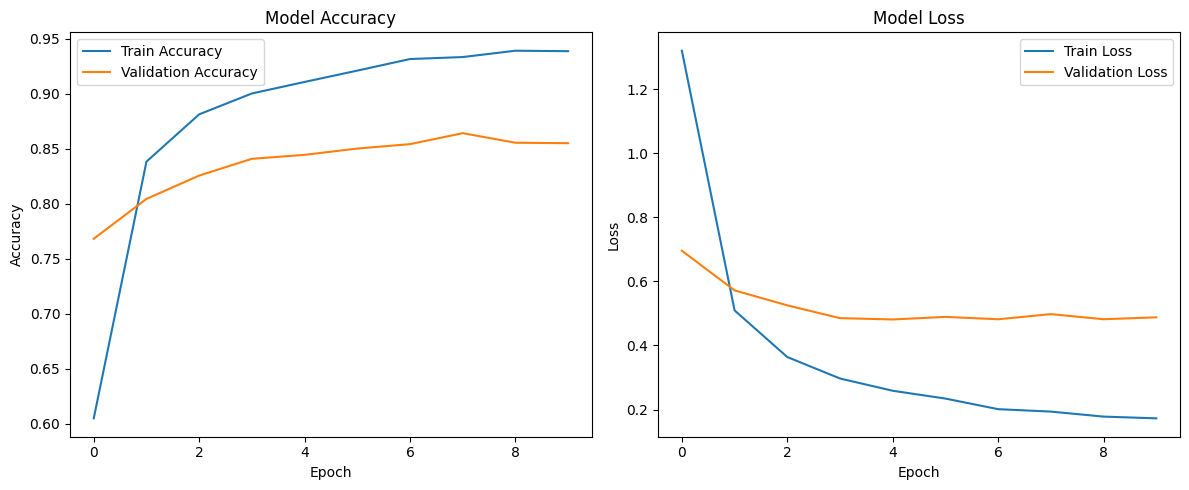

Found 4718 images belonging to 18 classes.


C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


148/148 ━━━━━━━━━━━━━━━━━━━━ 42s 274ms/step


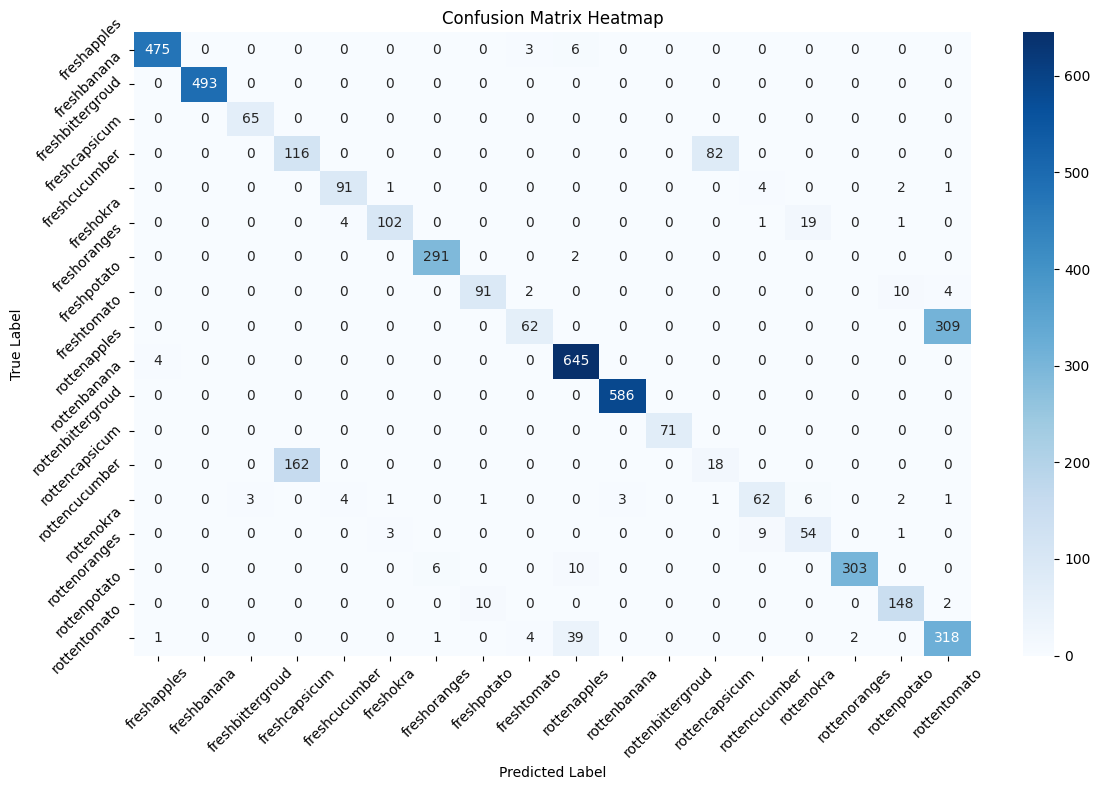

Classification Report:

                   precision    recall  f1-score   support

      freshapples       0.99      0.98      0.99       484
      freshbanana       1.00      1.00      1.00       493
 freshbittergroud       0.96      1.00      0.98        65
    freshcapsicum       0.42      0.59      0.49       198
    freshcucumber       0.92      0.92      0.92        99
        freshokra       0.95      0.80      0.87       127
     freshoranges       0.98      0.99      0.98       293
      freshpotato       0.89      0.85      0.87       107
      freshtomato       0.87      0.17      0.28       371
     rottenapples       0.92      0.99      0.95       649
     rottenbanana       0.99      1.00      1.00       586
rottenbittergroud       1.00      1.00      1.00        71
   rottencapsicum       0.18      0.10      0.13       180
   rottencucumber       0.82      0.74      0.78        84
       rottenokra       0.68      0.81      0.74        67
    rottenoranges       0.99   

In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# ================================
# Paths
# ================================
save_dir = r"C:\Users\sagni\Downloads\food spoilage prediction"
train_dir = r"C:\Users\sagni\Downloads\food spoilage prediction\archive (1)\dataset\Train"

model_path = os.path.join(save_dir, "food_spoilage_model.h5")
history_path = os.path.join(save_dir, "training_history.pkl")
label_encoder_path = os.path.join(save_dir, "label_encoder.pkl")

# ================================
# Load training history
# ================================
with open(history_path, "rb") as f:
    history = pickle.load(f)

# ================================
# Plot accuracy & loss
# ================================
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history["accuracy"], label="Train Accuracy")
plt.plot(history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history["loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# ================================
# Load model
# ================================
model = load_model(model_path)

# ================================
# Prepare validation data for evaluation
# ================================
img_size = 224
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

# ================================
# Predictions & confusion matrix
# ================================
preds = model.predict(val_gen)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen.classes

with open(label_encoder_path, "rb") as f:
    label_encoder = pickle.load(f)

class_labels = label_encoder.classes_

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# ================================
# Classification Report
# ================================
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))
